In [1]:
# ipython magic functions for automatic reloading coda changes in .py files
%load_ext autoreload
%autoreload 2
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
import plotting_utils as plt_utils
from save_scores import convert_to_percentiles
import ConvLSTM_PyTorch_master.utils as utils
import pickle
import torch 
import datetime 
import gc 
import matplotlib.pyplot as plt 

root          = '../../../../../../mnt/data/scheepensd94dm'
data_root     = '../../../../../../mnt/data/scheepensd94dm/data/' # set manually to data root 
models_root   = '../../../../../../mnt/data/scheepensd94dm/saved_models_final/' # set manually to model root 
plots_root    = './plots/'
examples_root = './example_forecasts/'
scores_root   = './saved_scores_final/'

class args():
    def __init__(self):
        self.frames_predict=12
        self.batch_size=16
        self.hpa=1000
        self.num_years=42
        self.begin_testset=40
args = args()

save_plots=True

if not save_plots: 
    save_as=None 

# 2 Methodology
## 2.1 Data Collection and Preprocessing 

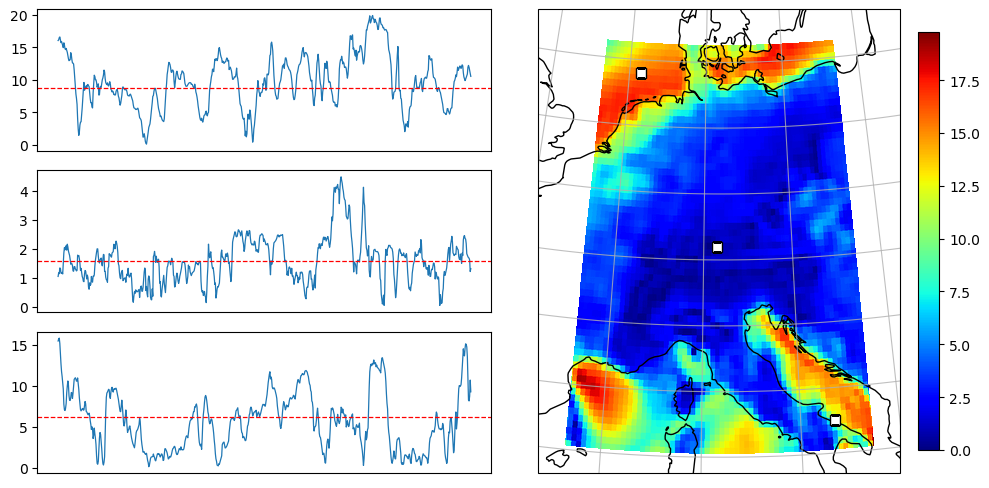

In [31]:
# Figure 1 
if save_plots: 
    save_as=os.path.join(plots_root,'data_example_frame.pdf')
    
plt_utils.plot_example_frame(data, 0, save_as)

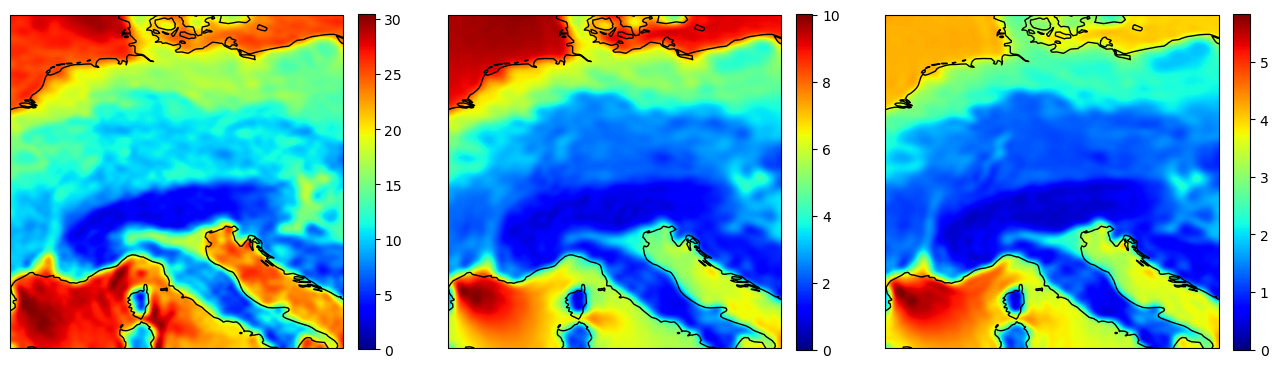

In [32]:
# Figure 2 
if save_plots: 
    save_as=os.path.join(plots_root,'data_maps_raw.pdf')
    
plt_utils.plot_maps(data, save_as)

### 2.2.1 Weighted Loss  

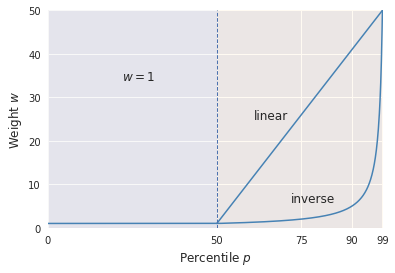

In [23]:
# Figure 4
if save_plots: 
    save_as=os.path.join(plots_root,'weight_function.pdf')
    
plt_utils.plot_weight_function(save_as)

### 2.2.2 Squared Error-Relevance Area Loss 

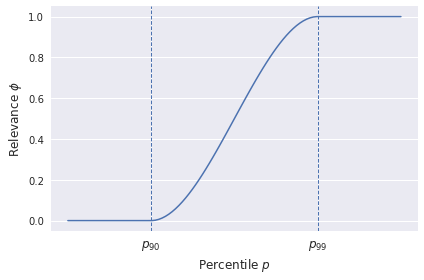

In [4]:
# Figure 5 
if save_plots:
    save_as=os.path.join(plots_root,'relevance_function.pdf')
    
plt_utils.plot_relevance_function(save_as)

# 3 Results 

In [28]:
score = 'pod'

for model_name in ['wmae_i_4',
                   'wmse_i_4',
                   'wmae_l_5',
                   'wmse_l_4',
                   'sera_p90_5',
                   'sera_p75_5',
                   'sera_p50_5',
                   'mae_5',
                   'mse_5',
                   'persistence']:

    scores = np.load(os.path.join(scores_root,'%s/scores_scales.p'%model_name),allow_pickle=True)
    
    # format for all scores is a dictionary {score: (thresholds, scales)}
    # except for rmse which is {rmse: (thresholds)}
    # we only investigate the pixel scale 0
    
    if score != 'rmse': 
        print(np.round(scores[score][:,0],3)) 
    else: 
        print(np.round(scores[score],3))
    

[0.866 0.858 0.809 0.761 0.583 0.262]
[0.861 0.846 0.788 0.735 0.531 0.201]
[0.979 0.885 0.712 0.612 0.408 0.18 ]
[0.966 0.884 0.689 0.583 0.389 0.187]
[0.814 0.871 0.938 0.945 0.614 0.215]
[0.849 0.921 0.924 0.844 0.527 0.225]
[0.907 0.932 0.828 0.712 0.467 0.188]
[0.836 0.76  0.656 0.58  0.419 0.215]
[0.819 0.755 0.652 0.565 0.371 0.142]
[0.774 0.678 0.582 0.523 0.408 0.268]


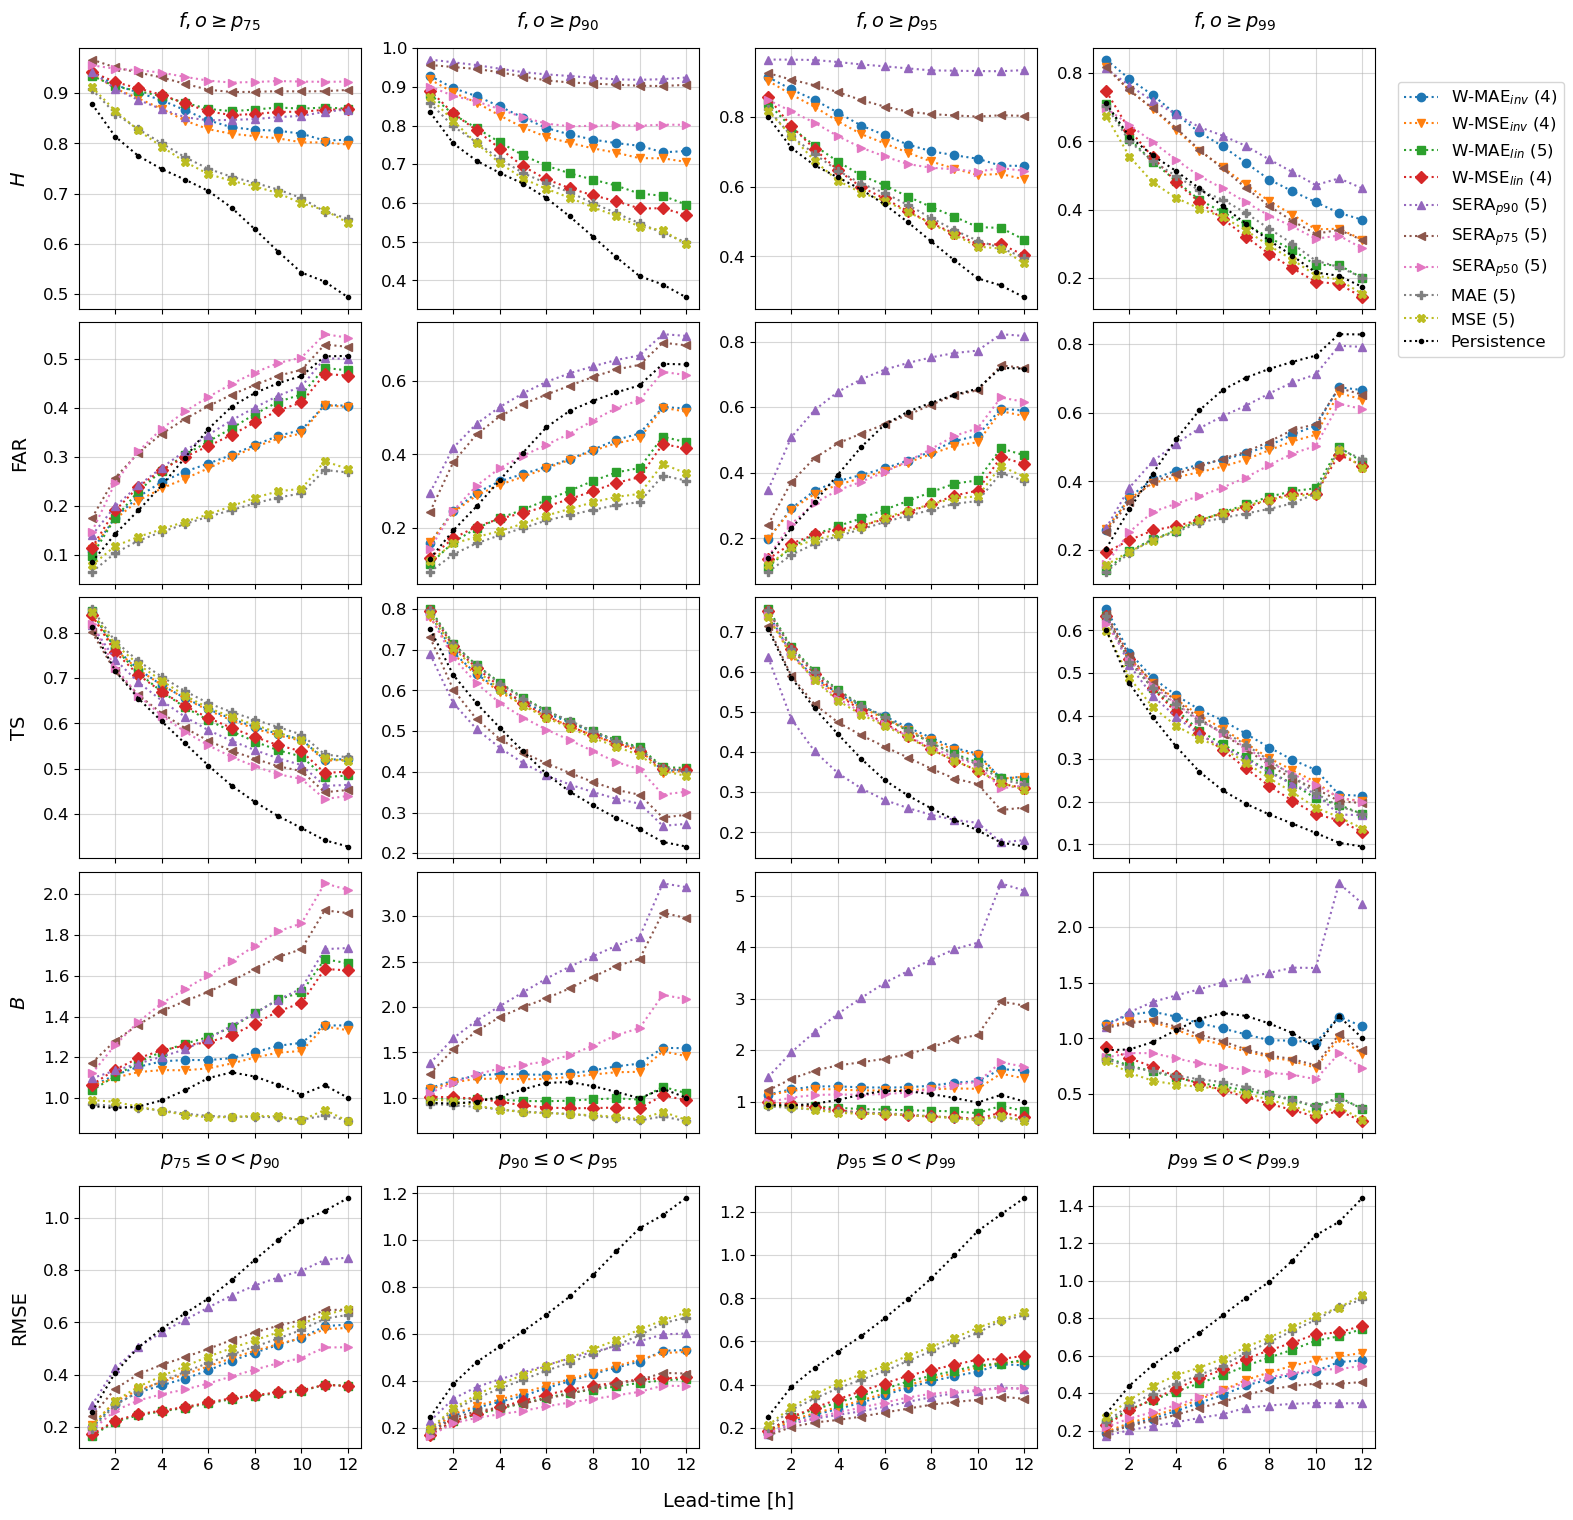

In [2]:
# Figure 6
if save_plots:
    save_as=os.path.join(plots_root,'model_comparison_all.pdf')
    
plt_utils.plot_model_comparison_all(scores_root, save_as)

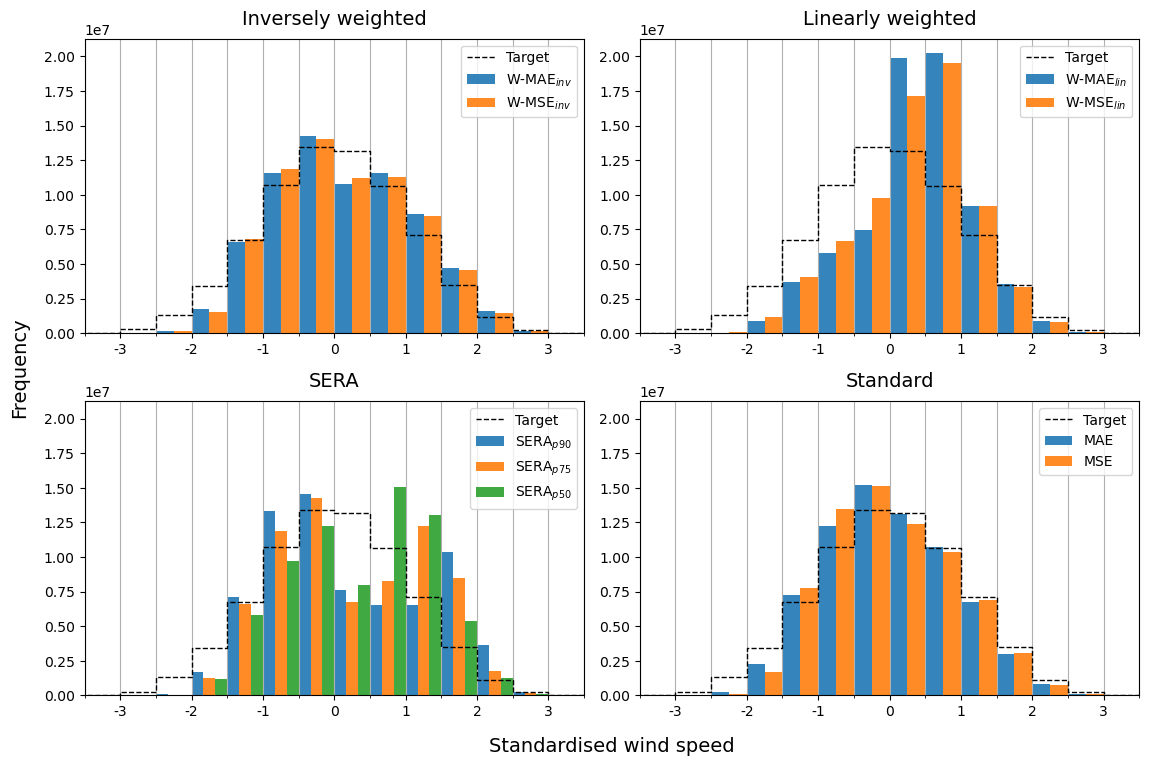

In [3]:
# Figure 7

# def compute_distr(data):
#     l, r = -5, 10 #data.min(), data.max()
#     bins = np.linspace(l, r, (r-l)*2+1)
#     hist, bin_edges = np.histogram(data, bins)
#     return hist, bins 

# for i, (loss, n) in enumerate([['wmae_i',4],['wmse_i',4],['wmae_l',5],['wmse_l',4],['sera_p90',5],['sera_p75',5],['sera_p50',5],['mae',5],['mse',5]]):
#     args.loss = loss
#     args.num_layers = n
#     net = load_model(args)

#     test_loader = load_era5(root=data_root, args=args, a=None, b=None, c=args.begin_testset, training=False, 
#                             data=np.load(root+'/data/era5_standardised_test.npy'))

#     if i==0: 
#         inputs, targets = utils.predict_batchwise_persistence(test_loader)
#         del inputs
#         hist, bins = compute_distr(targets)
#         np.save(os.path.join(scores_root,'dist_array_target.npy'), [bins,np.append(hist,0)])

#     preds = utils.predict_batchwise(test_loader, net, device)
#     del test_loader, net 
#     gc.collect()

#     hist, bins = compute_distr(preds)
#     np.save(os.path.join(scores_root,'dist_array_%s.npy'%loss), [bins,np.append(hist,0)])

if save_plots:
    save_as = os.path.join(plots_root,'distributions.pdf')

plt_utils.plot_distributions(scores_root, save_as)

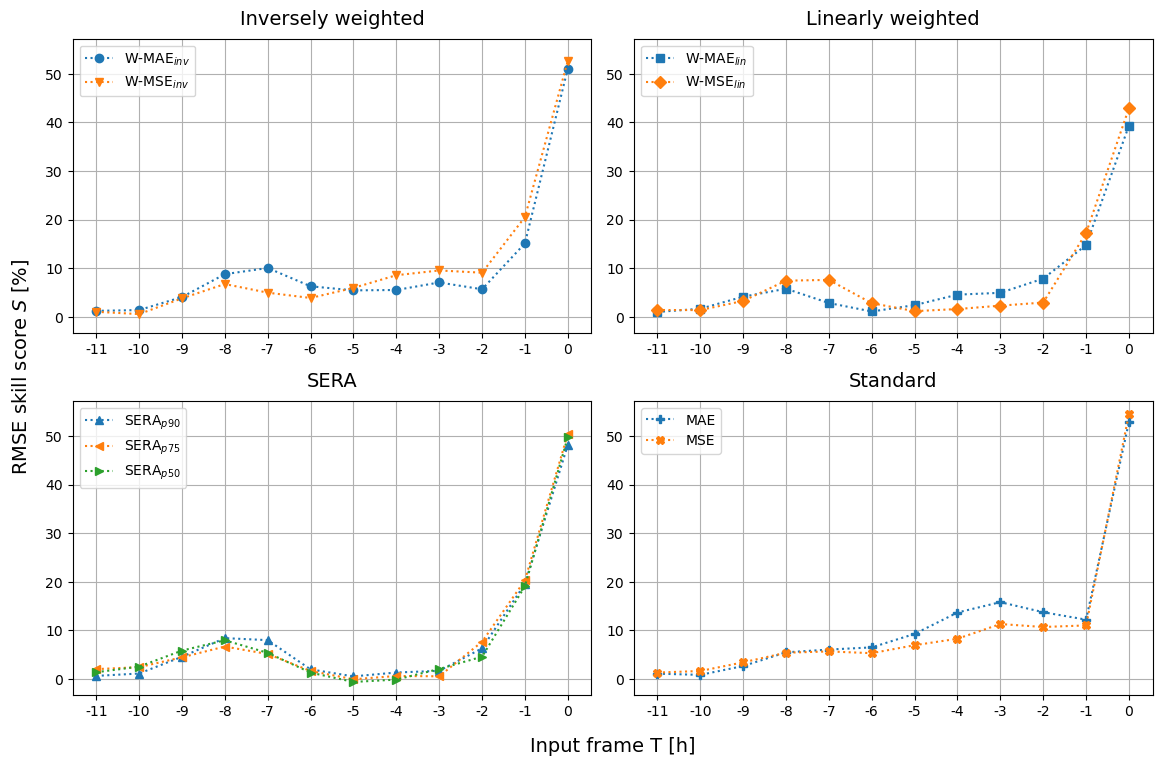

In [5]:
# Figure 8

# args.num_years=42
# args.begin_testset=40

# for loss, n in [['wmae_i',4],['wmse_i',4],['wmae_l',5],['wmse_l',4],['sera_p90',5],['sera_p75',5],['sera_p50',5],['mae',5],['mse',5]]:
    
#     print(loss)
#     args.loss = loss
#     args.num_layers = n
#     net = load_model(args)
    
#     test_loader = load_era5(root=data_root, args=args, a=None, b=None, c=args.begin_testset, training=False, 
#                             data=np.load(root+'/data/era5_standardised_test.npy'))
#     inputs, targets = utils.predict_batchwise_persistence(test_loader)
#     del test_loader 

#     rmse = plt_utils.forecasts_augmented(net, inputs, targets, device)
#     np.save(os.path.join(scores_root,'rmse_array_%s.npy'%loss), rmse)

if save_plots:
    save_as = os.path.join(plots_root,'forecasts_augmented_rmse.pdf')

plt_utils.plot_score_over_leadtime(scores_root, save_as)

### Example Forecasts

In [5]:
from ConvLSTM_PyTorch_master.encoder import Encoder
from ConvLSTM_PyTorch_master.decoder import Decoder
from ConvLSTM_PyTorch_master.model import ED
from ConvLSTM_PyTorch_master.net_params import convlstm_encoder_params, convlstm_decoder_params, convgru_encoder_params, convgru_decoder_params
from ConvLSTM_PyTorch_master.data_loader import load_era5
import ConvLSTM_PyTorch_master.utils as utils 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Use device: ", device)

Use device:  cuda:0


In [6]:
def load_model(args):
    
    STAMP = "%s_%s"%(args.loss, args.num_layers)
    save_dir = os.path.join(models_root, STAMP)

    encoder_params = convlstm_encoder_params(args.num_layers, args.frames_predict)
    decoder_params = convlstm_decoder_params(args.num_layers, args.frames_predict)

    encoder = Encoder(encoder_params[0], encoder_params[1]).cuda()
    decoder = Decoder(decoder_params[0], decoder_params[1], args.num_layers).cuda()
    net = ED(encoder, decoder)

    if torch.cuda.device_count() > 1:
        net = nn.DataParallel(net)
    net.to(device)

    # load model
    print('==> loading existing model')
    model_info = torch.load(os.path.join(save_dir, 'checkpoint.pth.tar'))
    net.load_state_dict(model_info['state_dict'])
    net.eval()
    print('Done.')
    return net 

In [11]:
# getting inputs and targets of the test loader... 

args.loss = 'mae'
args.num_layers = 5
model = load_model(args)

args.num_years=42
args.begin_testset=40

test_loader = load_era5(root=data_root, args=args, a=None, b=None, c=args.begin_testset, training=False)
inputs, targets = utils.sample_dataloader(test_loader)
del test_loader 

==> loading existing model
Done.
loading data
number of years: 42.0
converting to Tensors...
done
done


In [ ]:
args.begin_testset, args.num_years = 30, 40 # getting 10 years of training data to use for the percentiles 
train_loader = load_era5(root=data_root, args=args, a=None, b=None, c=args.begin_testset, training=False)
args.begin_testset, args.num_years = 40, 42 
test_loader = load_era5(root=data_root, args=args, a=None, b=None, c=args.begin_testset, training=False)

In [15]:
def get_percentiles(data):
    percentiles = []
    for p in [50,75,90,95,99,99.9,100]:
        percentiles.append(np.percentile(data,p))
    return np.array(percentiles)

def convert_to_percentiles(test_preds, train_targs, train_preds=None):
    gc.collect()
    result_preds = np.zeros(test_preds.shape)

    for i in range(64):
        for j in range(64): 
            #p_targs = get_percentiles(train_targs[:,:,i,j])
            #p_preds = get_percentiles(train_preds[:,:,i,j])
            percentiles = get_percentiles(train_targs[:,:,i,j])

            for k in range(1,7): 
                # convert local values to local percentiles 
                #result_targs[:,:,i,j][test_targs[:,:,i,j]>=p_targs[k-1]] = k 
                #result_preds[:,:,i,j][test_preds[:,:,i,j]>=p_preds[k-1]] = k
                result_preds[:,:,i,j][test_preds[:,:,i,j]>=percentiles[k-1]] = k
                                
    return result_preds 

In [106]:
# getting all predictions of all models on the testset and converting them to percentiles

for loss, n in [['wmae_i',4],['wmse_i',4],['wmae_l',5],['wmse_l',4],['sera_p90',5],['sera_p75',5],['sera_p50',5],['mae',5],['mse',5]]:
    args.loss = loss
    args.num_layers = n
    net = load_model(args)
    
    train_targets = utils.predict_batchwise_persistence(train_loader)[1]
    print('1')
    preds = utils.predict_batchwise(test_loader, net, device)
    print('2')
    preds = convert_to_percentiles(preds, train_targets)
    np.save(os.path.join(data_root, 'test_preds_percentiles_%s.npy'%loss), preds)

==> loading existing model
Done.
1
2
==> loading existing model
Done.
1
2
==> loading existing model
Done.
1
2
==> loading existing model
Done.
1
2
==> loading existing model
Done.
1
2
==> loading existing model
Done.
1
2
==> loading existing model
Done.
1
2
==> loading existing model
Done.
1
2
==> loading existing model
Done.
1
2


In [12]:
# inputs and targets in terms of percentiles... 

train_targets = utils.predict_batchwise_persistence(train_loader)[1]
inputs, targets = utils.predict_batchwise_persistence(test_loader)
inputs = convert_to_percentiles(inputs, train_targets)
np.save(os.path.join(data_root, 'test_inputs_percentiles.npy'), inputs)
targets = convert_to_percentiles(targets, train_targets)
np.save(os.path.join(data_root, 'test_targets_percentiles.npy'), targets)

In [108]:
del train_loader, test_loader, inputs, targets, preds, train_targets, net 
gc.collect()

NameError: name 'inputs' is not defined

In [2]:
loss_names = ['wmae_i','wmse_i','wmae_l','wmse_l','sera_p90','sera_p75','sera_p50','mae','mse']
all_preds = []
for loss in loss_names:
    all_preds.append(np.load(os.path.join(data_root, 'test_preds_percentiles_%s.npy'%loss)))

inputs = np.load(os.path.join(data_root, 'test_inputs_percentiles.npy'))
targs = np.load(os.path.join(data_root, 'test_targets_percentiles.npy'))

In [3]:
# determining dates of the inputs... 

delta = 12
start_date = datetime.datetime(1979,1,1,0) + datetime.timedelta(days=365*args.begin_testset) # first testset date
dates = [start_date + datetime.timedelta(hours=delta+delta*i) for i in range(len(inputs))]

In [ ]:
### visualising all models ... 

def single_prediction(net, inputs):
    inputs = inputs.unsqueeze(2).to(device)
    pred = net(inputs).squeeze().detach().cpu().numpy()
    return pred 

save_plots = True

for t in range(0,len(inputs)):
    gc.collect()
    print(t)
#     inputs_ = torch.FloatTensor(inputs[t]).unsqueeze(0)
    pred_list = []

#     for i, net in enumerate(nets): 
#         pred = single_prediction(net, inputs_)
#         targ, pred = convert_to_percentiles(targets[t], pred, train_targets)
#         pred_list.append(pred)

#     ens = ensemble.predict(inputs_, device)
#     pred_list.append(ens)
    
    for i in range(len(all_preds)):
        pred_list.append(all_preds[i][t])
    
    #vmin, vmax = -1, 4
    vmin, vmax = 0, 6
    ticklabels = ['0','50','75','90','95','99','99.9','100']
    label = 'Local percentile threshold'
    if save_plots: 
        save_as = os.path.join(examples_root, 'example_%s.png'%t)   
    plt_utils.plot_forecast_comparison(inputs[t], targs[t], pred_list, dates[t], t, vmin, vmax, label=label, ticklabels=ticklabels, save_as=save_as)

1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
